##### Version 0.1

`Created by Olaf Behrendt 2020-04-25, last change 2020-04-26`

# SIR Szenarien Simulationen für COVID-19 in Deutschland

# Schätzung des zukünftigen Entwicklung der COVID-19 Neuinfektionen

## Einführung

Um die Entwicklung der **täglichen Anzahlen der Neuinfektionen** abzuschätzen, kalibrieren wir ein SIR-Modell (susceptible-infected-removed model)  mit der vom RKI abgeschätzen Reproduktionszahl R und einer mittleren Dauer der Infektiösität von fünf Tagen. Dann simulieren wir für weiter Reproduktionszahlen R den Verlauf der täglichen Neuinfizierten (siehe [Ergebnisse für die Szenarien](#ergebnisse-für-die-szenarien)).

Wir sehen, dass eine Reproduktionszahl größer als 1.0 schnell zu einem nichtlinearen (exponentiellen) Anstieg der Neuinfizierungen führen kann und andererseits eine Reproduktionszahl von knapp unter 1.0 nur eine langsame Abnahme der Neuinfizierungen zur Folge hat. Letzteres bedeutet insbesondere, dass Maßnahmen zur Kontakvermeidung für einen längeren Zeitraum (Monate oder bis eine Impfung bzw. Behandlung zur Verfügung steht) aufrechtzuerhalten sind.

Eine Strategie um eine Überlastung des Gesundheitswesen zu verhindern ist, zunächst massive Kontatbeschränken für einige Wochen zu verhängen, um dann nach drastischen Sinken der täglichen Neuinfektionen die Kontaktbeschränkungen zügig wieder lockeren zu können (Schulen, Kindergärten und Läden können mit einigen Einschränkungen wieder öffnen). Neue Fälle können schnell nachverfolgt und isoliert werden, sodass ein erneuerter Anstieg der Fallzahlen vermieden werden kann. Diese Strategie hat China erfolgreich verfolgt. Unsere Simulationen mit verschiedenen Reproduktionszahlen deutet darauf hin, dass für ein schnelles Absinken der täglichen Neuinfektionen die Reproduktionsrate in Richtung 0.8 gesenkt werden müsste.

Eine weitere Strategie um eine Überlastung des Gesundheitswesen zu verhindern ist, die Infektionsrate unter 1.0 zu halten, dies aber bei dann notwendigerweise über einen längeren Zeitraum (bis eine Impfung/Behandlung zur Verfügung steht) und mit relativ starken Kontakbeschränkungen. Nachverfolgen und Isolieren ist bei der konstant hohen Anzahl von Neuinfizierten nicht ausreichend, um die Ausbreitung zu begrenzen (mehr als ein paar hundert Fälle pro Tag können die Gesundheitsbehörden zur Zeit nicht schnell genug nachverfolgen um weitere Neuinfektionen zu verhindern).

Es ist nicht klar welche Strategie die deutsche Bundesregierung oder die Bundesländer verfolgen. Die kürzlich veranlassten Lockerungen, scheinen auf die zweite Variante (lange Phase starker Kontakeinschränkungen) hinzudeuten, da einerseits die Anzahl der Neuinfizierten noch zu hoch für eine intensive Nachverfolgung von Kontaktpersonen ist, sowie andererseits die Reproduktionszahl laut Daten des RKI mit 0.9 für die erste Strategie noch zu hoch erscheint.

Möglicherweise hoffen die Verantwortlichen aber auch, durch die "_Corona-App_" und durch das Aufstocken des Personals zur Nachverfolgung der Kontaktpersonen die Infektionsentwicklung auch bei größeren Neuinfektionszahlen in den Griff zu bekommen. Wir wissen es schlichtweg nicht. Leider kommunizieren die Verantwortlichen nicht, mit welche Strategie sie die COVID-19 Epidemie in Deutschland bekämpfen (wollen).

## Daten zu Neuinfektionen

Das Robert Koch Institut (RKI) hat im [17. Epidemologische Bulletin](https://www.rki.de/DE/Content/Infekt/EpidBull/epid_bull_node.html) vom 23 April 2020 (EpB-17-20) auf Basis der Meldedaten den Krankheitsbeginn (Beginn der Symptomatik) geschätz. Auf der Basis des so ermittelten Erkrankungsbeginn und der Annahme einer konstanten Generationszeit (durchschnittlichen Zeit zwischen Erkrankungsbeginn einer Person A und dem Erkrankungsbeginn einer von A angesteckten Person B, vgl. auch [serielles Intervall](https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Steckbrief.html)) von vier Tagen schätzen die Fachleute vom RKI die effektive Reproduktionszahl $R$ (die im wesentlichen noch mit der Bruttoreproduktionszahl $R_0$ übereinstimmt, solange nicht die Zahl der Immunnisierten einen signifikanten Anteil an der Grundgesamtheit hat). Wie aus der Abb. 4 in [EpB-17-20, S. 14](https://www.rki.de/DE/Content/Infekt/EpidBull/Archiv/2020/Ausgaben/17_20.pdf?__blob=publicationFile) abzulesen ist, bewegen sich die Reproduktionszahl seit dem 22.3. zwischen 1.0 und 0.9 (nur zwei Tage bei 1.0).

<!-- ![](EpB-17-20-Abb4.png) -->


## Kurzdarstellung SIR-Modell

Das SIR-Modell (susceptible-infected-removed model) besteht aus einem Differentialgleichungssystem mit drei gewöhnlichen Differentialgleichung die jeweils Übergängen zwischen den Gruppen der ansteckbaren (suscepible) $S(t)$, infizierten (infected) $I(t)$ und gesundeten bzw. verstorbenen (removed) $R(t)$ Personen in Abhängigkeit von der Zeit $t$ beschreiben. Die Übergänge

$$S\stackrel{\beta\cdot IS}\longrightarrow I \stackrel{\gamma\cdot I}\longrightarrow R.$$

werden durch 

* $\pmb\beta$ (beta, engl.: _**contact rate** or spreading rate or infection rate_), die durchschnittliche 
  **Übertragungsrate** pro Tag,
* $\pmb\gamma$ (gamma, engl.: _**recovery-rate**_), die durchschnittliche Rate pro Tag, mit der
  eine infizierte Person gesundetet oder verstirbt, also insbesondere nicht mehr ansteckend (immun) ist
  
quantifiziert. Für die Reproduktionszahl $R$ gilt

$$
R_0 = \frac{\beta}{\gamma}\quad\text{bzw.}\quad \beta=R_0\cdot\gamma
$$

Das DGL-System lautet

\begin{aligned}
S'(t) &= -\beta I(t)S(t)\\
I'(t) &= \beta I(t)S(t)-\gamma I(t)\\
R'(t) &= \gamma I(t)
\end{aligned}

Details zum Modell sind in [Simulation des SIR-Modell der Epidemologie](https://nbviewer.jupyter.org/github/olaf-beh/SIR/blob/master/sir.ipynb) oder [Wikipedia SIR-model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model) zu finden.


## Simualtion mit SIR Modell

Folgende Annahmen und Parameter machen wir:

* Die durchscnittliche Dauer der Infektiösität setzten auf fünf Tage fest, d.h. $\gamma:=0.20.$

* Die Anzahl der neu Infizierten schätzen wir aus der Anzahl der neu Erkrankten aus [COVID-19-Lagebericht vom 25.04.2020](https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Situationsberichte/Gesamt.html) auf täglich $\approx 2000$ zum Projektsbeginn am 16. April.

* Der Projektionsbeginns am 16. April ergibt sich aus der letzten _Nowcast_ Schätzung der Krankheitsbeginne des RKIs für den 21. April abzüglich einer angenommen durchschnittlichen Inkubationszeit von fünf Tagen.

Auf Basis der obigen Annahmen kalibrieren wir das SIR-Modell, d.h. wir stellen insbesondere die Gesamtanzahl der Infizierten so ein, dass für $\gamma=0.20$ ungefähr täglich $2000$ neu Infizierte zum Simulatiomsbeginn hinzukommen. Damit erhalten wir dann eine Anzahl von ungefähr 11,000 infizierten Personen zum 16. April.

Der Leser ist eingeladen, selber Simulationen auf Basis des hier implementierten  Modells (Jupyter-Notebook) vorzunehmen, um die Ergebnisse kritisch zu verifizieren.

<!-- ![COVID-19-Lagebericht vom 25.04.2020](Situationsbericht-20-04-25-Abb7.png) -->

## Ergebnisse für die Szenarien


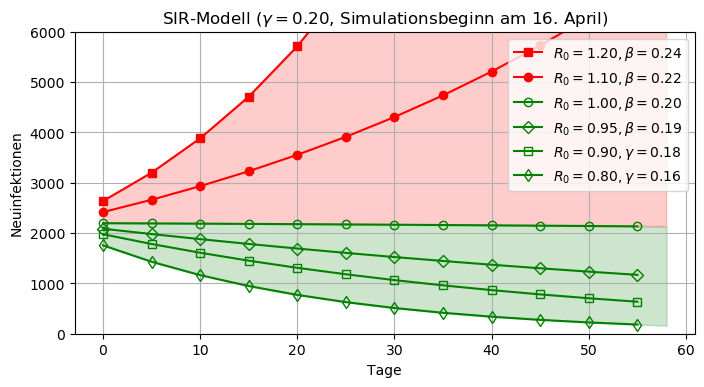

In [26]:
### Zeichnen der Simulationsergebnisse für die Szenarien
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8, 4), dpi=100)
col1='green'; col2='red'
ax1.fill_between(x, y10, y08, alpha=0.2, color=col1)
ax1.fill_between(x, y12, y10, alpha=0.2, color=col2)
ax1.plot(x[0:-1:5], y12[0:-1:5], marker='s', fillstyle='full', color=col2, label='$R_0=1.20, \\beta=%.2f$' % (1.2*gamma))
ax1.plot(x[0:-1:5], y11[0:-1:5], marker='o', fillstyle='full', color=col2, label='$R_0=1.10, \\beta=%.2f$' % (1.1*gamma))
ax1.plot(x[0:-1:5], y10[0:-1:5], marker='o', fillstyle='none', color=col1, label='$R_0=1.00, \\beta=%.2f$' % (1.0*gamma))
ax1.plot(x[0:-1:5], y095[0:-1:5], marker='D', fillstyle='none', color=col1, label='$R_0=0.95, \\beta=%.2f$' % (0.95*gamma))
ax1.plot(x[0:-1:5], y09[0:-1:5],  marker='s', fillstyle='none', color=col1,  label='$R_0=0.90, \\gamma=%.2f$' % (0.90*gamma))
ax1.plot(x[0:-1:5], y08[0:-1:5],  marker='d', fillstyle='none', color=col1, label='$R_0=0.80, \\gamma=%.2f$' % (0.80*gamma))
plt.title("SIR-Modell ($\\gamma=%.2f$, Simulationsbeginn am 16. April)" % (gamma))
plt.xlabel('Tage')
plt.ylabel('Neuinfektionen')
plt.grid()
plt.legend()
plt.ylim([0,6000])
plt.show()

## SIR Implementation und Berechnung der Szenarien

Die Anzahl der täglichen Neuinfizierten berechnen wir, indem die die tägliche Veränderung in der Gruppe der Ansteckbaren (susceptible) 

$$\Delta I(t) := S(t)-S(t-1)$$

berechnen.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (8,4)

### Funktion um die Änderungen für einen Zeitschritt zu berechenen
def step_calc(S,I,R,beta,gamma,i):
    Delta_S = - beta * I[i] * S[i] * Delta_t
    Delta_R = gamma * I[i] * Delta_t
    Delta_I = - (Delta_S + Delta_R)
    S[i+1] = S[i] + Delta_S 
    R[i+1] = R[i] + Delta_R
    I[i+1] = I[i] + Delta_I

def simulate(beta,gamma,plot):
    ### Initialisierungen
    global S,I,R
    S = np.zeros(n); I = np.zeros(n); R = np.zeros(n) # Mit 0 initialisiertes Array der Länge n
    I[0] = i
    R[0] = r
    S[0] = 1.0 - I[0] - R[0]       # S + I + R = 1.0
    ### Iterationschleife zur Berechnung aller Werte
    for t in range(0, n-1):
        step_calc(S,I,R,beta,gamma,t)
    if plot:
        plot_sim(S,I,R,beta, gamma)
    
### Ausgabe Ergebnis
def plot_sim(S,I,R,beta, gamma):
    x = np.arange(start=0.0, stop=n*Delta_t, step=Delta_t) # x-Werte 
    plt.plot(x, S, label='$S(t)$ (susceptible)')
    plt.plot(x, I, label='$I(t)$ (infected)')
    plt.plot(x, R, label='$R(t)$ (removed)')
    plt.title("SIR-Modell ($R_0=%.3f$, $\\beta=%.3f$, $\\gamma=%.3f$)" % (beta/gamma, beta, gamma))
    plt.xlabel('Zeit in Tagen')
    plt.ylabel('Anteil Bevölkerung')
    plt.text(x[n-1], .22, "Max. Anzahl Infizierte: {:,}".format(int(I.max() * num)), horizontalalignment='right')
    plt.grid()
    plt.legend()
    #plt.savefig("sir-ex1.png")
    plt.show()

### Startwerte
gamma   = 0.2          # Entspricht 1/D_I mit D_I durchschnittliche Dauer der Infektiosität
num     = 83e6         # Gesamtbevölkerung
i       = 11e3/num     # Startanteil der durch Tests bestätigt infizierten Personen + Dunkelziffer
r       = 150e3/num-i  # Startanteil der gesundetet und verstorbenen Personen
n       = 60           # Anzahl der Zeitschritte 
Delta_t = 1            # Länge eines Zeitintervalls (Gesamte Intervallbreite = n * Delta_t)

###  Berechnung der Szenarien

# X-Werte
x = np.arange(start=0.0, stop=(n-1)*Delta_t, step=Delta_t)

# Y-Werte (Simulation SIR-Modell)
R_0=1.2; simulate(beta=gamma*R_0, gamma=gamma, plot=0)
y12 = num*(S - np.roll(S, -1))[:-1]  # differences between S(t) and S(t-1)
R_0=1.1; simulate(beta=gamma*R_0, gamma=gamma, plot=0)
y11 = num*(S - np.roll(S, -1))[:-1]  # differences between S(t) and S(t-1)
R_0=1.0; simulate(beta=gamma*R_0, gamma=gamma, plot=0)
y10 = num*(S - np.roll(S, -1))[:-1]  # differences between S(t) and S(t-1)
R_0=0.95; simulate(beta=gamma*R_0, gamma=gamma, plot=0)
y095 = num*(S - np.roll(S, -1))[:-1] # differences between S(t) and S(t-1)
R_0=0.9; simulate(beta=gamma*R_0, gamma=gamma, plot=0)
y09 = num*(S - np.roll(S, -1))[:-1]  # differences between S(t) and S(t-1)
R_0=0.8; simulate(beta=gamma*R_0, gamma=gamma, plot=0)
y08 = num*(S - np.roll(S, -1))[:-1]  # differences between S(t) and S(t-1)